In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Churn_Credit_processado.csv", delimiter=',')

df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0.0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0.0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0.0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0.0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0.0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,1011687.0,0.0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,1011687.0,1.0
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,1011687.0,0.0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0


In [3]:
# função describe mostra as variaveis quantitativas 
df.describe()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
count,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,9.970800e+04,99708.000000
mean,656.504283,38.144095,5.027992,55594.901735,1.553777,0.755406,0.497422,4.214435e+06,0.211457
std,80.280520,8.818943,2.806751,62789.275840,0.547746,0.429849,0.499996,5.531445e+06,0.408344
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+03,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.011687e+06,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.011687e+06,0.000000
75%,710.000000,42.000000,7.000000,119859.537500,2.000000,1.000000,1.000000,6.444375e+06,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,3.819017e+07,1.000000


no describe podemos ver que no balanco 25% e 50% tem inconsistencias

In [4]:
# verificando dados igual a 0 
(df['Balanco']==0).sum()

54033

In [5]:
(df['Balanco']==0).mean() * 100

54.19123841617524

isso nos mostra que 54% dos dados estão com 0, assim como no describe 25% e 50% estão como 0 

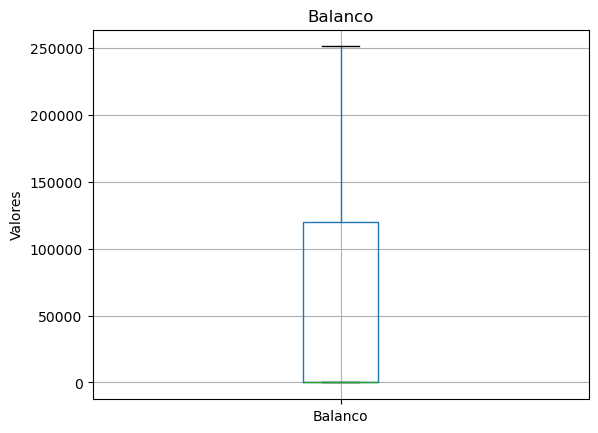

In [6]:
df.boxplot(column = 'Balanco')
plt.title('Balanco')
plt.ylabel('Valores')
plt.show()

no bloxplot podemos ver que a quantiade de valor 0 puxa o grafico para baixo e não poderm

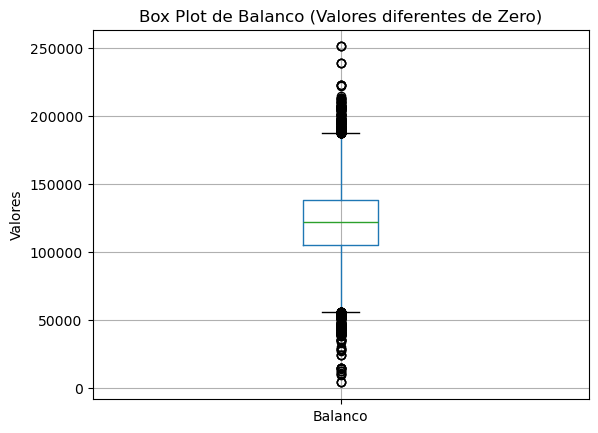

In [7]:
df_sem_zero = df[df['Balanco'] != 0 ]
df_sem_zero.boxplot(column ='Balanco')
plt.title('Box Plot de Balanco (Valores diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

Verifcamos que temos outliers fora do mapeamento dos dados, tanto acima e abaixo.

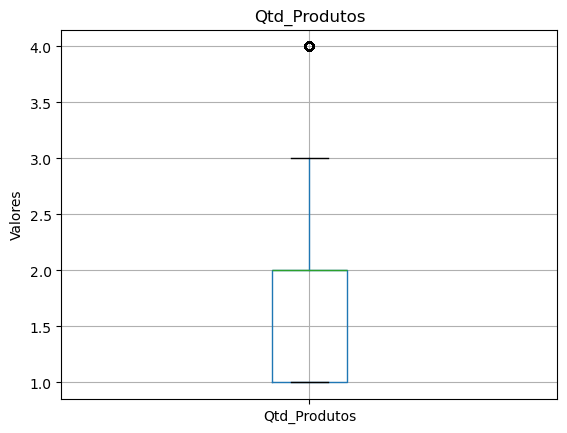

In [8]:
df.boxplot(column = 'Qtd_Produtos')
plt.title('Qtd_Produtos')
plt.ylabel('Valores')
plt.show()

Como a quantidades produtos apresenta outliers mais isso podemos relevar, pois pode ter cliente que contrataram 4 produtos.

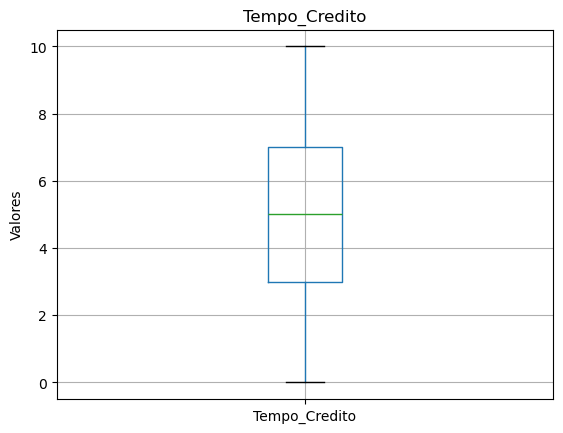

In [9]:
df.boxplot(column = 'Tempo_Credito')
plt.title('Tempo_Credito')
plt.ylabel('Valores')
plt.show()

Tempo_Credito é a tabela mais bem distribuida do arquivo.

Agora vamos analisar as variaveis boleanas pois precisa tratar elas antes da verificação

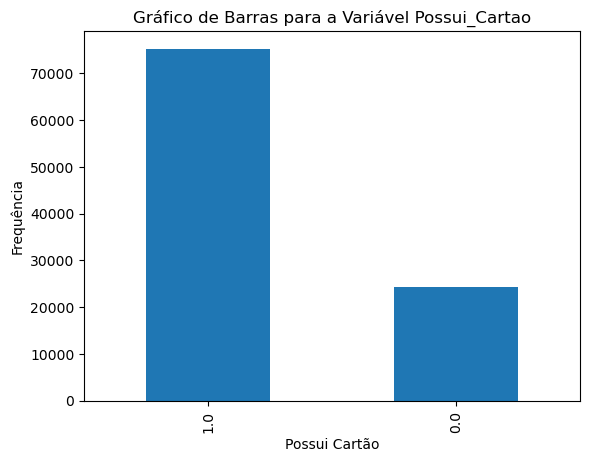

In [10]:
# Contagem  dos valores da coluna de Possui_Cartao

contagem_cartao = df['Possui_Cartao'].value_counts()

# Tranformando em porcentagem para que apareca no grafico
pporcentagem_cartao = (contagem_cartao / contagem_cartao.sum()) * 100
ax = contagem_cartao.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Possui_Cartao')
plt.xlabel('Possui Cartão')
plt.ylabel('Frequência')
plt.show()

In [11]:
# Contagem de ocorencia 
contagem_cartao = df['Possui_Cartao'].value_counts()

# Calculando a porcentagem 
(contagem_cartao / contagem_cartao.sum()) * 100

Possui_Cartao
1.0    75.540578
0.0    24.459422
Name: count, dtype: float64

Podemos ver que 75% da base de dados possuiu o produto e 24% não.

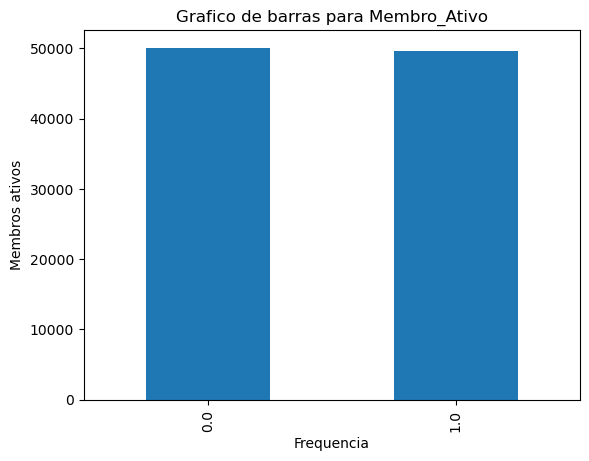

In [12]:
# Membros ativos
contagem_membro = df['Membro_Ativo'].value_counts()

porcentagem_membros = ( contagem_membro / contagem_membro.sum()) * 100
ax = contagem_membro.plot(kind= 'bar')
plt.title('Grafico de barras para Membro_Ativo')
plt.ylabel('Membros ativos')
plt.xlabel('Frequencia')
plt.show()

Podemos ver que os dados estão balanceado tanto de ativo para inativo

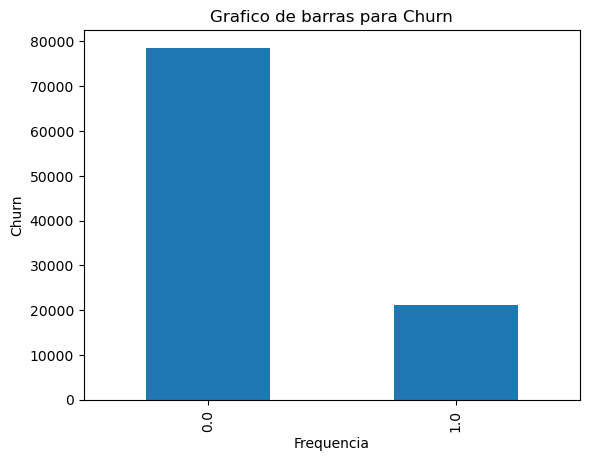

In [13]:
contagem_churn = df['Churn'].value_counts()

porcentagem_churn = (contagem_churn / contagem_churn.sum() * 100)
ax = contagem_churn.plot(kind='bar')
plt.title('Grafico de barras para Churn')
plt.ylabel('Churn')
plt.xlabel('Frequencia')
plt.show()

In [14]:
contagem_churn = df['Churn'].value_counts()
(contagem_churn / contagem_churn.sum()) * 100

Churn
0.0    78.854254
1.0    21.145746
Name: count, dtype: float64

 Verificamos que o Churn esta desbalanceado, assim podemos fazer uma precisão para um modelo de aprendizaem para que não da churn e quem pode dar churn pode não ser preciso

Agora vamos verificar variabeis categoricas

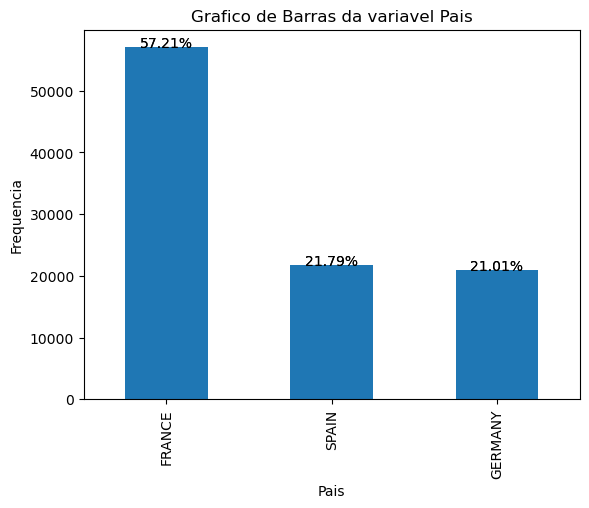

In [16]:
# Calculando porcentagens
contagem = df['Pais'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

# Informando a porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem.iloc[i]:.2f}%', ha='center')
plt.title('Grafico de Barras da variavel Pais')
plt.xlabel('Pais')
plt.ylabel('Frequencia')

plt.show()


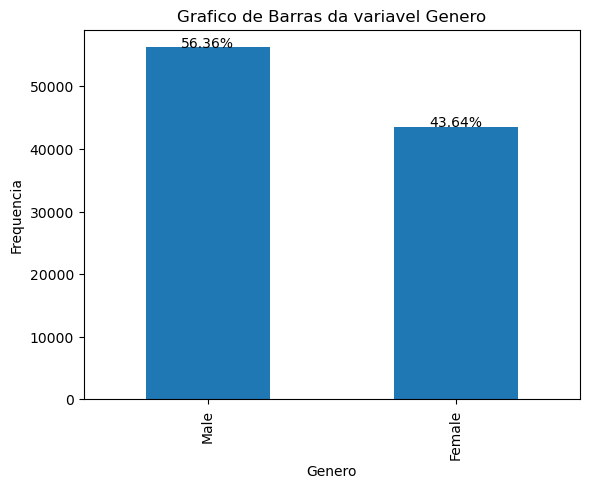

In [18]:
# Calculando porcentagens
contagem = df['Genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

# Informando a porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem.iloc[i]:.2f}%', ha='center')
plt.title('Grafico de Barras da variavel Genero')
plt.xlabel('Genero')
plt.ylabel('Frequencia')

plt.show()

Vamos pontuar os principais insights que retiramos dessa primeira análise univariada:

* Tanto a variável balanco quanto Qtd_Produtos possuem muitos outliers.

* A grande maioria dos nossos clientes possui cartão de crédito.

* Temos uma quantidade muito parecida de membros ativos e não ativos.

* A maioria dos nossos clientes está cituado na França.

* A proporção de mulheres e homens é bem semelhante.